In [24]:


import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
img = cv2.imread('C:/Users/lenovo/Desktop/PersonClassifier/model/test_images/2019-08-17-10-01-29-483.jpg')
img.shape

(1600, 900, 3)

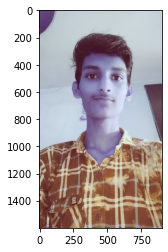

In [26]:
plt.imshow(img)

In [27]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1600, 900)

In [28]:
gray

array([[ 88,  89, 100, ..., 208, 208, 209],
       [100,  88, 104, ..., 208, 208, 209],
       [ 99,  99,  87, ..., 208, 208, 209],
       ...,
       [ 59,  53,  48, ..., 135, 133, 136],
       [ 57,  54,  46, ..., 148, 150, 150],
       [ 55,  59,  52, ..., 152, 153, 154]], dtype=uint8)

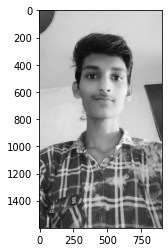

In [29]:
plt.imshow(gray,cmap='gray')

In [30]:
face_cascade = cv2.CascadeClassifier('C:/Users/lenovo/Desktop/PersonClassifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/lenovo/Desktop/PersonClassifier/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[227, 295, 498, 498]])

In [31]:
(x,y,w,h) = faces[0]
x,y,w,h

(227, 295, 498, 498)

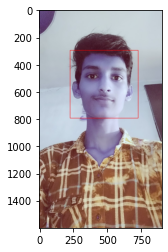

In [32]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

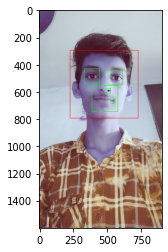

In [33]:
cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

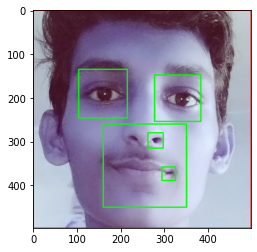

In [34]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [35]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) >= 2:
            return roi_color

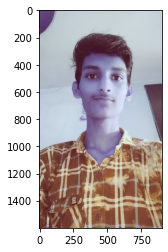

In [36]:
original_image = cv2.imread('C:/Users/lenovo/Desktop/PersonClassifier/model/test_images/2019-08-17-10-01-29-483.jpg')
plt.imshow(original_image)

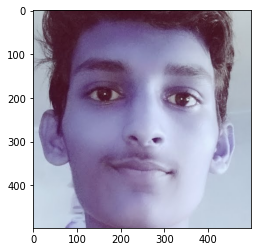

In [37]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/lenovo/Desktop/PersonClassifier/model/test_images/2019-08-17-10-01-29-483.jpg')
plt.imshow(cropped_image)

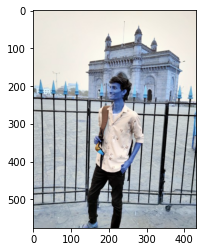

In [38]:
org_image_obstructed = cv2.imread('C:/Users/lenovo/Desktop/PersonClassifier/model/test_images/27978.jpg')
plt.imshow(org_image_obstructed)

In [39]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:/Users/lenovo/Desktop/PersonClassifier/model/test_images/27978.jpg')
print(cropped_image_no_2_eyes)

None


In [19]:
path_to_data = "C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset"
path_to_cr_data = "C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\cropped\\"

In [20]:
import os
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\dhananjay_prajapati',
 'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\dharmesh_prajapati',
 'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\mona_prajapati',
 'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\rakesh_jaiswal',
 'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\swati_pal']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

dhananjay_prajapati
Generating cropped images in folder:  C:\Users\lenovo\Desktop\PersonClassifier\model\dataset\cropped\dhananjay_prajapati
dharmesh_prajapati
Generating cropped images in folder:  C:\Users\lenovo\Desktop\PersonClassifier\model\dataset\cropped\dharmesh_prajapati
mona_prajapati
Generating cropped images in folder:  C:\Users\lenovo\Desktop\PersonClassifier\model\dataset\cropped\mona_prajapati
rakesh_jaiswal
Generating cropped images in folder:  C:\Users\lenovo\Desktop\PersonClassifier\model\dataset\cropped\rakesh_jaiswal
swati_pal
Generating cropped images in folder:  C:\Users\lenovo\Desktop\PersonClassifier\model\dataset\cropped\swati_pal


In [32]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray = img
    
    #Datatype Conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    
    #compute coefficients
    coeffs = pywt.wavedec2(imArray,mode,level=level)
    
    #Process Coefficient
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

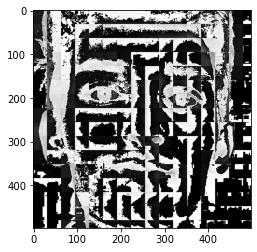

In [33]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap = 'gray')

In [34]:
celebrity_file_names_dict

{'dhananjay_prajapati': ['C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\cropped\\dhananjay_prajapati\\dhananjay_prajapati1.png',
  'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\cropped\\dhananjay_prajapati\\dhananjay_prajapati2.png',
  'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\cropped\\dhananjay_prajapati\\dhananjay_prajapati3.png',
  'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\cropped\\dhananjay_prajapati\\dhananjay_prajapati4.png',
  'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\cropped\\dhananjay_prajapati\\dhananjay_prajapati5.png',
  'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\cropped\\dhananjay_prajapati\\dhananjay_prajapati6.png',
  'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\cropped\\dhananjay_prajapati\\dhananjay_prajapati7.png',
  'C:\\Users\\lenovo\\Desktop\\PersonClassifier\\model\\dataset\\cropped\\dhananjay_prajapati\\dhananjay_prajapati8.png',
 

In [35]:
class_dict = {}
count = 0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'dhananjay_prajapati': 0,
 'dharmesh_prajapati': 1,
 'mona_prajapati': 2,
 'rakesh_jaiswal': 3,
 'swati_pal': 4}

In [75]:
X = []
y = []

for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        
        if img is None:
            continue
        
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [76]:
32*32*3 + 32*32

4096

In [77]:
len(X[0])

4096

In [78]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(130, 4096)

In [79]:
X[0]

array([ 89.,  81.,  92., ..., 230.,  19., 254.])

In [80]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5757575757575758

In [82]:
len(X_test)

33

In [83]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.00      0.00      0.00         2
           2       1.00      0.25      0.40         8
           3       0.60      0.60      0.60         5
           4       0.56      0.71      0.63         7

    accuracy                           0.58        33
   macro avg       0.56      0.48      0.47        33
weighted avg       0.67      0.58      0.56        33



In [84]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [85]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [86]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.617368,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.504211,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.711053,{'logisticregression__C': 5}


In [87]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [92]:
print(best_estimators['svm'].score(X_test,y_test))
print(best_estimators['logistic_regression'].score(X_test,y_test))

0.7575757575757576
0.696969696969697


In [100]:
best_clf = best_estimators['svm']

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       [ 0,  1,  3,  2,  2],
       [ 0,  0,  1,  4,  0],
       [ 0,  0,  0,  0,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

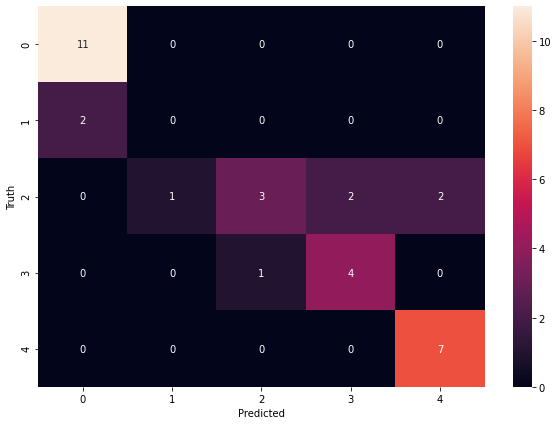

In [102]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [103]:
class_dict

{'dhananjay_prajapati': 0,
 'dharmesh_prajapati': 1,
 'mona_prajapati': 2,
 'rakesh_jaiswal': 3,
 'swati_pal': 4}

In [104]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [105]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))